In [197]:
import numpy as np
import pandas as numpy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [198]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [199]:

stats = df.describe(include = 'all')
print(stats)

                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110  

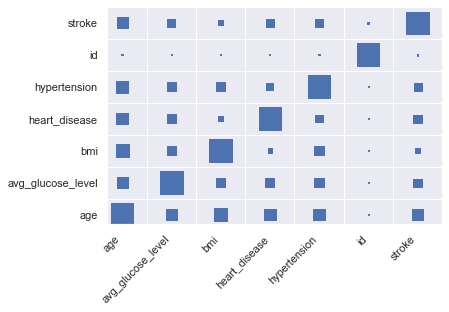

In [200]:

# Step 1 - Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )

    
    # Show column labels on the axes'

    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.set_yticklabels(y_labels)
    
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
columns = ['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke'] 
#columns = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
#columns = ['age','avg_glucose_level','bmi','heart_disease','id','stroke']
corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


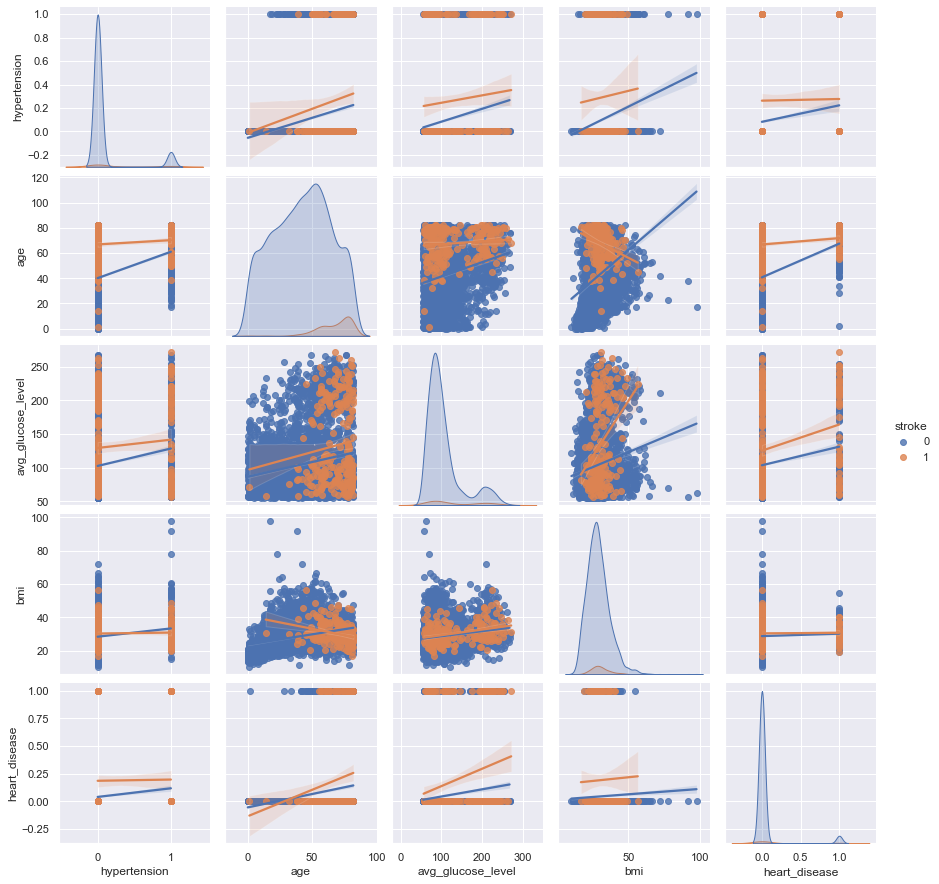

In [201]:

sns.pairplot(df, vars=['hypertension', 'age', 
                       'avg_glucose_level','bmi','heart_disease'],
                        kind='reg', hue='stroke')  

<AxesSubplot:xlabel='bmi', ylabel='age'>

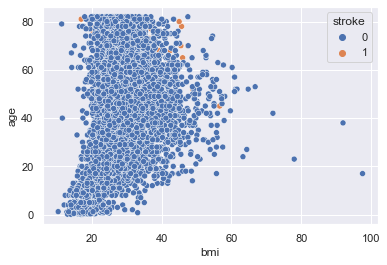

In [202]:
sns.scatterplot(data= df,x = 'bmi',y = 'age',hue = 'stroke')

<AxesSubplot:xlabel='stroke', ylabel='count'>

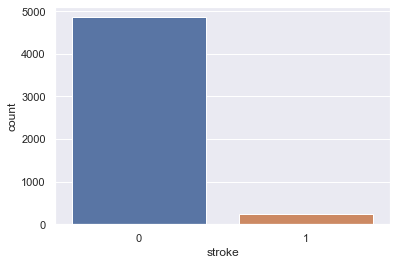

In [203]:
sns.countplot(data=data,x='stroke')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

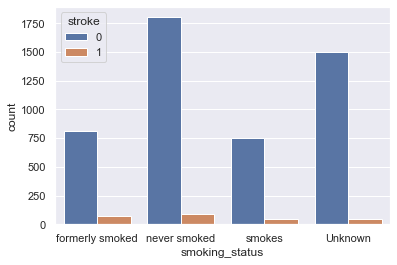

In [204]:

sns.countplot(data=df,x='smoking_status',hue='stroke')


<AxesSubplot:xlabel='ever_married', ylabel='count'>

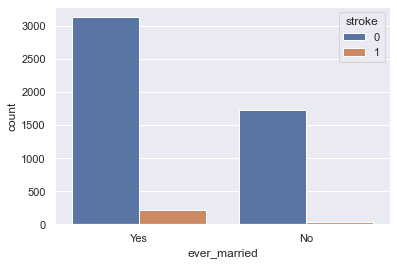

In [205]:

sns.countplot(data=df,x='ever_married', hue = 'stroke')


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

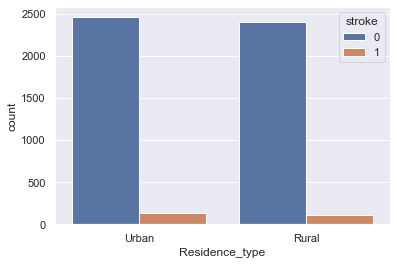

In [206]:

sns.countplot(data=df,x='Residence_type', hue = 'stroke')

<AxesSubplot:xlabel='work_type', ylabel='count'>

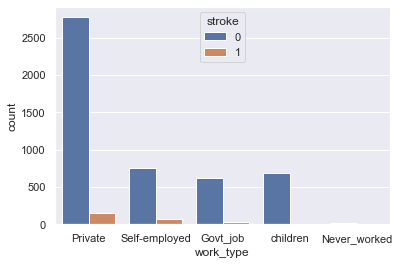

In [207]:
sns.countplot(data=df,x='work_type', hue = 'stroke')